## This is the 2-layer neural network workbook for ECE 239AS Assignment #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a two layer neural network.

In [133]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass

In [134]:
from nndl.neural_net import TwoLayerNet

In [135]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [136]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.38123121099e-08


### Forward pass loss

In [137]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

print(loss)

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

1.07169612386
Difference between your loss and correct loss:
0.0


In [138]:
print(loss)

1.07169612386


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [139]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)
#print(grads.shape)
# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print(grads[param_name].shape, param_grad_num.shape)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))
    


(3, 10) (3, 10)
W2 max relative error: 2.9632227682005116e-10
(3,) (3,)
b2 max relative error: 1.2482624742512528e-09
(10, 4) (10, 4)
W1 max relative error: 1.283285235125835e-09
(10,) (10,)
b1 max relative error: 3.172680092703762e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.0144978645878


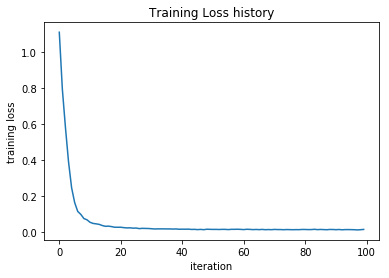

In [140]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [141]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, verbose=True):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [142]:
input_size = 32 * 32 * 3


def train_net(batch_size=200, learning_rate=1e-4, num_iters=1000, reg=0.25):
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=num_iters, batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=False)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)

    # Save this net as the variable subopt_net for later comparison.
    subopt_net = net
    return val_acc, stats, subopt_net

## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


Validation accuracy:  0.28


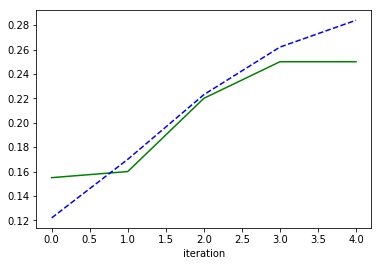

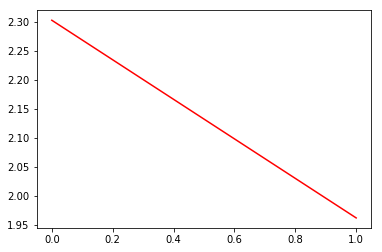

In [144]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies
# plot the loss history

#plt.plot(stats['loss_history'], 'r')
val_acc, stats, net = train_net()
subsampled_loss_history = stats['loss_history'][0::batch_size]
#print(subsampled_loss_history)


plt.plot(stats['train_acc_history'], 'g-')
plt.plot(stats['val_acc_history'], 'b--')
plt.xlabel('iteration')
#plt.ylabel('training loss')
#plt.title('Training Loss history')
plt.show()

plt.plot(subsampled_loss_history, 'r')

plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) It appears as if both training accuracy and validation accuracy are increasing for 1000 iterations. Since we haven't reached the point at which validation accuracy decreases and training accuracy increases (indicating overfitting), it's likely that SGD has not performed enough iterations to find a local min. It's also worth noting that the training and validation error seem to match. Typically there is a spread as the model becomes better at memorizing the data with extended training. If the model is overly complex, this spread will be large. If the model is not complex enough, a spread might just not exist.

In addition, the loss is decreasing linearly rather than exponentially decaying. It's possible that the learning rate might not be high enough.

(2) The first thing to optimize is the number of iterations. If we never reach the min, the accuracy of the model will be low. After this, learning rate can be adjusted as a hyperparameter if it is observed that the gradient is not stabilizing.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [ ]:
best_net = None # store the best model into this 
import itertools
# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #
#def train_net(batch_size=200, learning_rate=1e-4, num_iters=1000, reg=0.25):


#sweep number of iterations
num_iters = np.linspace(1000, 10000, num=5)
regs = np.linspace(0.1, 0.5, num=5)
batch_sizes = np.linspace(100, 800, num=5)
learning_rates = np.linspace(1e-5, 0.002500075, num=5)
#print(learning_rates)

combos = list(itertools.product(num_iters, regs, batch_sizes, learning_rates))

stats = []
nets = []
val_accs = []
for combo in combos: 
    n_iters = int(combo[0])
    reg = combo[1]
    batch_size = int(combo[2])
    lr = combo[3]
#    print("Iters: ", n_iters, " reg: ", reg, " batch_size: ", batch_size, " lr: ", lr)
    val_acc, cur_stats, cur_net = train_net(batch_size=batch_size,
                                            learning_rate=lr, 
                                            num_iters=n_iters,
                                           reg=reg)

    stats.append(cur_stats)
    nets.append(cur_net)
    val_accs.append(val_acc)
#    print("val accuracy: ", val_acc)
    #if(val_acc > 0.5):
     #   break

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


Validation accuracy:  0.195
Validation accuracy:  0.465
Validation accuracy:  0.464
Validation accuracy:  0.439
Validation accuracy:  0.378
Validation accuracy:  0.152
Validation accuracy:  0.457
Validation accuracy:  0.488
Validation accuracy:  0.463
Validation accuracy:  0.443
Validation accuracy:  0.207
Validation accuracy:  0.484
Validation accuracy:  0.454
Validation accuracy:  0.463
Validation accuracy:  0.464
Validation accuracy:  0.239
Validation accuracy:  0.466
Validation accuracy:  0.468
Validation accuracy:  0.476
Validation accuracy:  0.447
Validation accuracy:  0.208
Validation accuracy:  0.475
Validation accuracy:  0.479
Validation accuracy:  0.503
Validation accuracy:  0.5
Validation accuracy:  0.195
Validation accuracy:  0.467
Validation accuracy:  0.446
Validation accuracy:  0.409
Validation accuracy:  0.462
Validation accuracy:  0.239
Validation accuracy:  0.455
Validation accuracy:  0.469
Validation accuracy:  0.461
Validation accuracy:  0.41
Validation accuracy:  0

In [ ]:
best_index = np.argmax(val_accs)
best_combo = combos[best_index]
best_net = nets[best_index]
print("First hyperparameter combo over 0.5: \n", combo)
print("Validation accuracy: ", val_accs[best_index])

#generate the average net
val_acc, cur_stats, cur_net = train_net()
subopt_net = cur_net

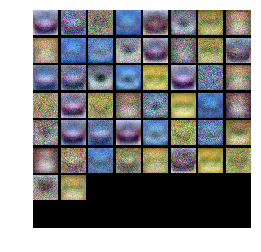

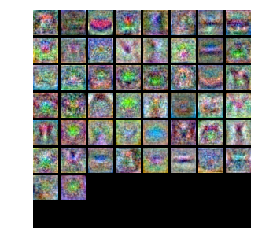

In [148]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The suboptimal net's weights appear to be less pronounced in terms of visual features than the better net. Specific shapes are easily discernable in the better net, whereas the suboptimal net's weights appear to be smoothed or averaged.

## Evaluate on test set 

In [149]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.497
